## 任务描述

1. 使用随机森林进行葡萄酒分析

## 相关知识

本节的数据来源是2009年UCI库中的Wine Qualit Data Set的数据,大家可以点击下方网址进行下载。(http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)

数据集共计1600个样本,包含了11个表示该葡萄酒样本的物理及化学性质数据,以及一个代表该葡萄酒样本质量的标志数据,分为高等、中等,低等3个质量等级,对应的样本量有346 (21.63%)、1194(74.62%)和60 (3.74%)。

In [1]:
import numpy
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pylab as plot

In [2]:
#从网页中读取数据
url="http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data=urllib.request.urlopen(url)

In [3]:
#将数据中第一行的属性读取出来放在names列表中，将其他行的数组读入row中，并将row中最后一列提取
#出来放在labels中作为标签，并使用pop将该列从row中去除掉，最后将剩下的属性值转化为float类型存入xList中
xlist=[]
labels=[]
names=[]
firstline=True
for line in data:
    if firstline:
        names=line.strip().split(b';')
        firstline=False
    else:
        row=line.strip().split(b';')
        labels.append(float(row[-1]))
        row.pop()
        floatrow=[float(num) for num in row]
        xlist.append(floatrow)

In [4]:
#计算几行几列
nrows=len(xlist)
ncols=len(xlist[1])
print(nrows)
print(ncols)

1599
11


In [5]:
#转化为numpy格式
x=numpy.array(xlist)
y=numpy.array(labels)
winenames=numpy.array(names)

In [6]:
#随机抽30%的数据用于测试，随机种子为531固定值，确保多次运行结果相同便于优化算法
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=531)

In [7]:
mseoos=[]
#测试50棵~500棵决策树的方差(步长10)
ntreelist=range(50,500,10)
for itrees in ntreelist:
    depth=None
    maxfeat=4
    #随机森林算法生成训练
    winerandomforestmodel=ensemble.RandomForestRegressor(n_estimators=itrees,max_depth=depth,max_features=maxfeat,oob_score=False,random_state=531)
    winerandomforestmodel.fit(xtrain,ytrain)
    #测试方差放入列表
    prediction=winerandomforestmodel.predict(xtest)
    mseoos.append(mean_squared_error(ytest,prediction))
print("MSE")
print(mseoos[-1])

MSE
0.318127065111759


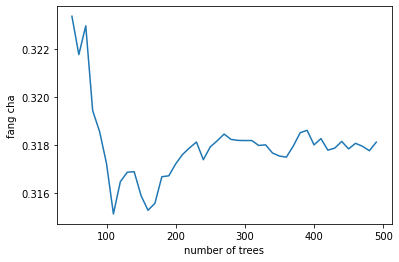

In [8]:
plot.plot(ntreelist,mseoos)
plot.xlabel("number of trees")
plot.ylabel("fang cha")
plot.show()

In [9]:
#用feature_importances_方法提取属性重要性
featureimportance=winerandomforestmodel.feature_importances_
#归一化
featureimportance=featureimportance/featureimportance.max()
#argsort方法返回array类型的索引
sorted_idx=numpy.argsort(featureimportance)
#函数说明：arange([start,] stop[, step,], dtype=None)根据start与stop指定的范围以及step设定的步长，生成一个 ndarray
barpos=numpy.arange(sorted_idx.shape[0]) + .5

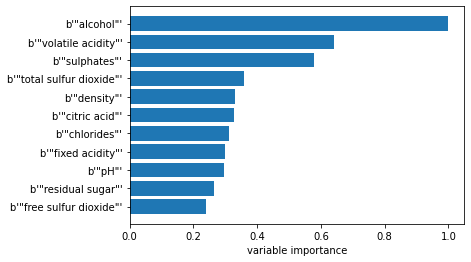

In [10]:
plot.barh(barpos,featureimportance[sorted_idx],align='center')
plot.yticks(barpos,winenames[sorted_idx])
plot.xlabel("variable importance")
plot.show()

## 编程要求

复习上述内容，根据提示在Begin和End之间完成随机森林生成以及方差计算的代码编写。

运行结果为：
MSE
0.31856764403292176

In [ ]:
import numpy
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pylab as plot

#从网页中读取数据
url="http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data=urllib.request.urlopen(url)

#将数据中第一行的属性读取出来放在names列表中，将其他行的数组读入row中，并将row中最后一列提取
#出来放在labels中作为标签，并使用pop将该列从row去去除掉，最后将剩下的属性值转化为float类型存入xList中
xlist=[]
labels=[]
names=[]
firstline=True
for line in data:
    if firstline:
        names=line.strip().split(b';')
        firstline=False
    else:
        row=line.strip().split(b';')
        labels.append(float(row[-1]))
        row.pop()
        floatrow=[float(num) for num in row]
        xlist.append(floatrow)

#计算几行几列
nrows=len(xlist)
ncols=len(xlist[1])

#转化为numpy格式
x=numpy.array(xlist)
y=numpy.array(labels)
winenames=numpy.array(names)

#随机抽30%的数据用于测试，随机种子为531固定值，确保多次运行结果相同便于优化算法
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=531)

mseoos=[]
#测试50棵~100棵决策树的方差(步长10)
ntreelist=range(50,100,10)
for itrees in ntreelist:
    depth=None
    maxfeat=4
************** Begin **************
    #随机森林算法生成训练
    
    
    #测试方差放入列表

**************  End  ************** 
print("MSE")
print(mseoos[-1])


## 参考答案

In [ ]:
    #随机森林算法生成训练
    winerandomforestmodel=ensemble.RandomForestRegressor(n_estimators=itrees,max_depth=depth,max_features=maxfeat,oob_score=False,random_state=531)
    winerandomforestmodel.fit(xtrain,ytrain)
    #测试方差放入列表
    prediction=winerandomforestmodel.predict(xtest)
    mseoos.append(mean_squared_error(ytest,prediction))